# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.117655e+01     7.585006e+00
 * time: 0.0017919540405273438
     1     2.851400e+01     4.889216e+00
 * time: 0.009280920028686523
     2     2.025019e+01     4.354414e+00
 * time: 0.04635500907897949
     3     1.461551e+01     3.406941e+00
 * time: 0.05093193054199219
     4     1.072619e+01     1.599098e+00
 * time: 0.05595588684082031
     5     1.004610e+01     2.445791e+00
 * time: 0.05987811088562012
     6     9.481044e+00     1.142601e+00
 * time: 0.0649409294128418
     7     9.030390e+00     1.144272e+00
 * time: 0.07027101516723633
     8     8.707527e+00     1.176298e+00
 * time: 0.07540011405944824
     9     8.478427e+00     9.870374e-01
 * time: 0.08127689361572266
    10     8.367961e+00     9.103014e-01
 * time: 0.08569788932800293
    11     8.240336e+00     6.638689e-01
 * time: 0.09084892272949219
    12     8.222244e+00     1.196445e+00
 * time: 0.09435009956359863
    13     8.137277e+00     7.958194e-01
 * tim

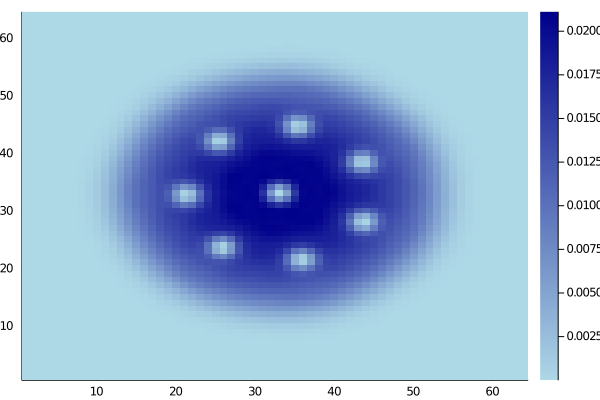

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)